In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Generate data

In [2]:
TRUE_W = 3.0
TRUE_B = 2.0
NUM_EXAMPLES = 1000

# A vector of random x values
x = tf.random.normal(shape=[NUM_EXAMPLES])

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = x * TRUE_W + TRUE_B + noise

## Define the model

In [3]:
class MyModel( tf.Module ):
  def __init__(self, act=None, **kwargs):
    super().__init__(**kwargs)
    self.w = tf.Variable(5.0) #  tf.Variable (  shape=(n0, n1) )
    self.b = tf.Variable(0.0)
    self.activation = act

  def __call__(self, x):
    if self.activation is None:  # W x + b
      return self.w * x + self.b # x W + b
    else:
      return self.activation( self.w * x + self.b )

## Define Loss function

In [4]:
@tf.function
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

## Train the model

In [5]:
l1 = MyModel()
l2 = MyModel()

learning_rate= 0.01
epochs = 35

In [6]:
for epoch in range(epochs):
    
    with tf.GradientTape() as t:
      yhat = l2( l1(x) ) 
      current_loss = loss(y, yhat)
    
    dw1, db1, dw2, db2  = t.gradient(current_loss, [l1.w, l1.b, l2.w, l2.b])
    
    l1.w.assign_sub(learning_rate * dw1)
    l1.b.assign_sub(learning_rate * db1)
    l2.w.assign_sub(learning_rate * dw2)
    l2.b.assign_sub(learning_rate * db2)

    print( "Epoch %2d: loss=%2.5f" % (epoch, current_loss) )

Epoch  0: loss=488.05527
Epoch  1: loss=26.33070
Epoch  2: loss=13.79885
Epoch  3: loss=8.48865
Epoch  4: loss=5.76771
Epoch  5: loss=4.21069
Epoch  6: loss=3.25152
Epoch  7: loss=2.62829
Epoch  8: loss=2.20658
Epoch  9: loss=1.91194
Epoch 10: loss=1.70067
Epoch 11: loss=1.54589
Epoch 12: loss=1.43045
Epoch 13: loss=1.34303
Epoch 14: loss=1.27595
Epoch 15: loss=1.22392
Epoch 16: loss=1.18316
Epoch 17: loss=1.15097
Epoch 18: loss=1.12536
Epoch 19: loss=1.10487
Epoch 20: loss=1.08837
Epoch 21: loss=1.07504
Epoch 22: loss=1.06421
Epoch 23: loss=1.05539
Epoch 24: loss=1.04819
Epoch 25: loss=1.04228
Epoch 26: loss=1.03743
Epoch 27: loss=1.03344
Epoch 28: loss=1.03015
Epoch 29: loss=1.02744
Epoch 30: loss=1.02519
Epoch 31: loss=1.02334
Epoch 32: loss=1.02180
Epoch 33: loss=1.02052
Epoch 34: loss=1.01946


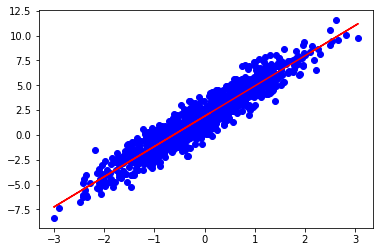

In [7]:
plt.scatter(x, y, c="b")
plt.plot(x, l2(l1(x)), c="r")
plt.show()